# Python Day 1
----
____
____
**Goals for Today**
- Learn to import useful packages
- Learn basic File I/O using
    - NumPy
    - json

## Package Import
----
____
To import a package you simpy type `import <package name>`. In the code box below (between the quotes) try typing `import numpy`. Then run the code cell. From now on, you if you are told to type text in a cell, go ahead and run it.

In [1]:
### Place your code below here

### Place your code above here
numpy.random.rand(20)

It is also possible to import a package using an alias that you define or import a specific function from a packate. Between the first set of quotes in the cell below try typing `import numpy as np`.

In [2]:
### Place your code below here

### Place your code above here
np.random.rand(20)

The two code blocks above do the exact same thing (generate a numpy array with 20 random elements). In the first case we simply imported the package, so we use it's full name. In the second case, we decided to call it **np**. It is possible to use any string of letters as an alias as long as it doesn't coencide with the name of another package or function. *That would just be confusing.*

Most [coding practices](https://www.python.org/dev/peps/pep-0008/#imports) discourage importing entire packages (especially custom packages). Instead it is often better do import specific functions. This is called an **absolute import**. These types of imports are often make your code more readable and better behaved, but they are not always neccessary. In the first code cell below try typing `from numpy import random`. In the second code cell try typing `from numpy.random import rand`.

In [3]:
### Place your first code below here

### Place your first code above here
random.rand(20)

In [4]:
### Place your second code below here

### Place your second code above here
rand(20)

The second code is an instance of an **absolute import**, because when the function is called with only one name. It is also possible to import all functions in a package at once using a wildcard: `*`. This is often frowned upon because it reduces the readability of your code and can confuse some automated tools. We will learn more practical uses for wildcards in the Linux section of this course.

Now that we have learned how to import packages, lets import some useful ones. We have already imported numpy many times, so that one is set. In the code cell below type `from datetime import datetime as dt`, `from json import dumps, load` on seperate lines. Normally, it is best practice to do all imports at the top of the page. We will do this for the homework later on.

## File Input
----
____
We will be using the data shown in the previous tutorial from the U.S. Geological Survey. We will be looking at two different formats for the data. The first is iaga2002 and the second is json. Take a minute to look at both sets of data.

<u>Geomagnetic data from January 17, 2018</u> :
- [iaga2002 data with basic column header format](https://geomag.usgs.gov/ws/edge/?id=BOU&starttime=2018-01-17)
- [json format data](https://geomag.usgs.gov/ws/edge/?id=BOU&starttime=2018-01-17&format=json)

It is much easier to see the iaga2002 formatted data in the browser. One tool that can be used to make viewing json files easier is the [JsonView](https://chrome.google.com/webstore/detail/jsonview/chklaanhfefbnpoihckbnefhakgolnmc?hl=en) extension for Chrome. This allows you to toggle keys and hide/view lists.

Both data sets are were given to you. Use VIM to remove the heading from the iaga2002 data, making sure to take note of what eaching column represents.

### File Input with Numpy
---
NumPy arrays can read in files using the `loadtxt` function. Try running `np.loadtxt('geomag_iaga2002.txt')` in the code cell below.

**OH NO. What went wrong?!**
<img src="https://memeguy.com/photos/thumbs/mrw-my-porn-freezes-and-im-close-to-climax-170477.gif" alt="Monkey gif">

You received a value error, there are two types of data: numbers and strings. If the file only included one or the other, this error wouldn't have occurred. One way around this is defining the datatype of the input. Let's call everything a string, since the dates cannot be converted to floats or ints. Run `iaga_data = np.loadtxt("Geomag.txt", dtype=str)` and then take a look at the shape of the array (`print(iaga_data.shape)`. This is a two dimensional array made up of rows an columns. Print out the first line of data using `print(iaga_data[0])`.

This printed out a row not a column. The `loadtxt` function reads in data as rows. Switching between rows and collumns can easily be done by using the transpose function. Try `iaga_data = iaga_data.T`, and then print out the first line of data again. 

Now that we have our rows and columns in the correct orientation, we can begin seperating out the data to make it easier to use. Remember that we index starting at zero, so the columns are ordered as follows:
- [0] Date
- [1] Time
- [2] Day of Year
- [3] X Component
- [4] Y Component
- [5] Z Component
- [6] Total Field

Lets assign the data that we want to use to specific variables:
- Assign the dates to a variable named **dates1**
- Assign the times to a variable named **times1**
- Assign the X Component to a variable named **x1**
- Assign the Y Component to a variable named **y1**
- Assign the Z Component to a variable named **z1**
- Assign the Total Field to a variable named **f1**

Since we assigned everything as a string, the components need to be returned to a float type. To do this with the X component for example, the command is `x1 = iaga_data[3].astype(float)`.

Next, print out the shapes of the variables. They should now be one dimensional arrays.

Since the dates were also read in as a string, it might make sense to convert them to datetime objects that are easier for plotting. To make a new array of datetime objects combining the dates and times we read in, we must use the [strptime](https://www.tutorialspoint.com/python/time_strptime.htm) function while looping over both arrays. An example of this would be:
```
date_times1 = []
for idx in range(len(dates1)):
    date_times1 += [dt.datetime.strptime(dates1[idx]+'_'+times1[idx],
            "%Y-%m-%d_%H:%M:%S.%f")]
```
Another example can be seen in the welcome_to_notebooks tutorial under the `read_geomag_data` method.
    
Try assigning the dates and times to new datetime array and then print the result.

Now that these variables are individual arrays it is much easier to manipulate and plot the data. We will do this next week.

### File Input with JSON
---
Scientists often like to put data in json format, because it allows them to record metadata without using an inconvenient header. As a result, we do not need to reformat the data using VIM.

Json files are made up of key/value pairs. In python this is called a [dictionary](https://www.python-course.eu/dictionaries.php). Looking at the json file we are using, we can see that the entire document is a dictionary (denoted by the curly braces **{**), and at the top level there are four keys: type, metadata, times, and values. These keys have pairs:
- type is paired with the string "Timeseries"
- metadata is paired with the a sub-dictionary
- times is paired with a list
- values is paired with a list
<img src="pairs.png" width="50%" height="50%"/>

It is possible to get a value from a dictionary by calling its matching key. In order to test this lets first load the data using:

```with open('geomag_json.json') as data_file:    
       json_data = json.load(data_file)
```

Then try looking at the structure of the data by printing json_data.

We are trying to access the times and the values, so we should access the keys that hold them. The times are inside the dictionary under the key 'times', so the command to get them is `times2 = json_data['times']`. The component values are a little trickier. They are in the dictionary under the key 'values', but the value pair is a list. The list is in turn made up of a dictionary of each component holding metadata and the actual values. To access the first component (X), the command is `x2 = json_data['values'][0]['values']`. To access the second component (Y), the command is `y2 = json_data['values'][1]['values']`. 

Lets assign the data that we want to use to specific variables like we did before:
- Assign the times to a variable named **times2**
- Assign the X Component to a variable named **x2**
- Assign the Y Component to a variable named **y2**
- Assign the Z Component to a variable named **z2**
- Assign the Total Field to a variable named **f2**

Similarly the times were read in as strings. Convert them to datetimes using the strptime function used before. Take note that the format has changed so the syntax of the function parameters will change as well. Make sure to look at the [documentation page](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior) and examples if you have trouble.

## File Output
----
____

### File Input with Numpy
---
There are [many different ways](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.io.html) to numpy arrays to a files. Using the `savetxt` function will likely be the most convenient for the purpose of this course. Take a moment to look at the [documentation page](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savetxt.html#numpy.savetxt). 

Using save the savetxt method also allows you to attach a header and comments to the data. Try exporting the data to a file with the header like seen below (use your name and the current date):
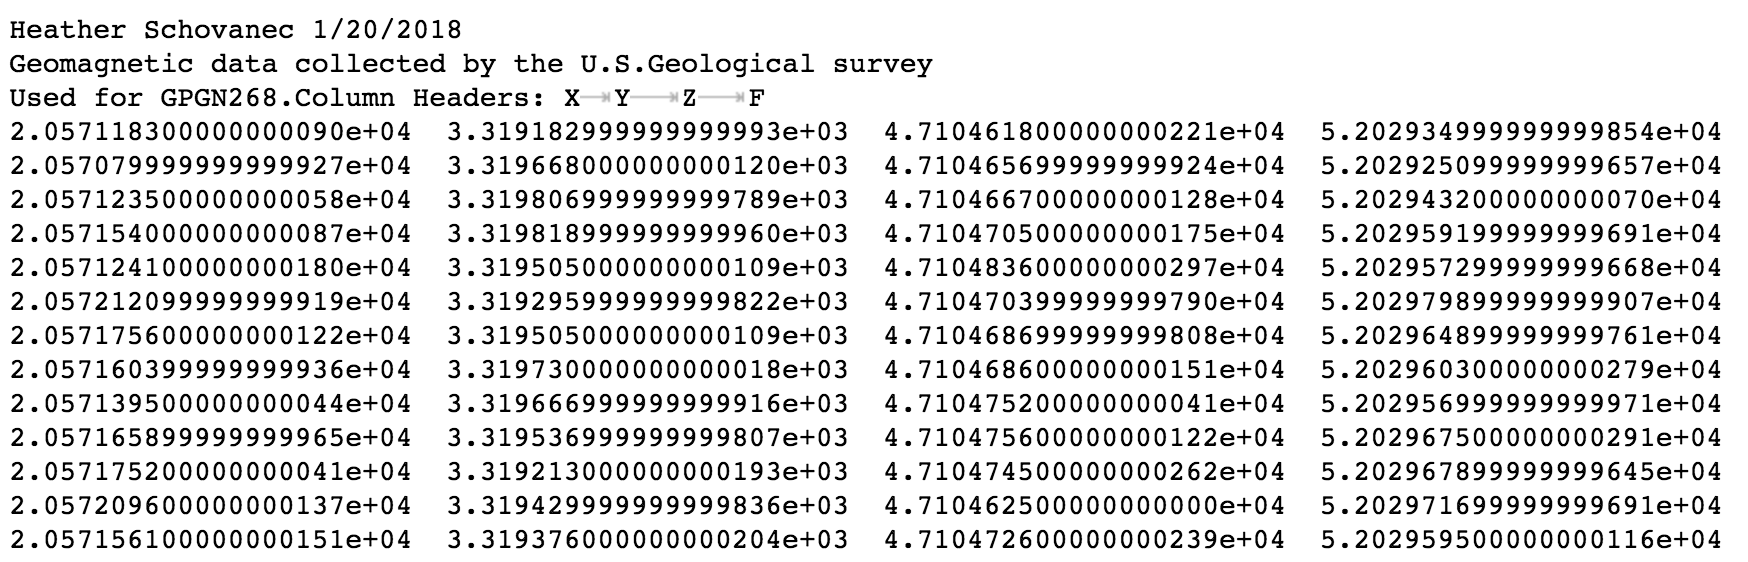


Remember, we transposed the orgiginal array when we read in the data using `loadtxt`. To output the data, we need to do the same. Instead of using `(x1, y1, z1, f1)` as the **X : array_like** parameter, you must use `np.transpose([x1,y1,z1,f1]`. 

If you attempt to export the dates as well, you must format all arrays as the same datatype. A string is the simplest option.

### File Output with JSON
---
Outputting a json file is relatively simpler. Dictionaries can handle multiple data types, so far less formatting is necessary. All that is necessary is to put the data in a dictionary and use the [`dumps` method](https://docs.python.org/2/library/json.html).

For example:
```
output = {}
output['header'] = {}
output['header']['author'] = "Heather"
output['header']['date'] = "January 20, 2018"
output['header']['credits'] = "U.S. Geological Survey"
output['times'] = date_times2
output['X'] = x2

with open('data.json', 'w') as outfile:
    json.dump(output, outfile)
```

results in:
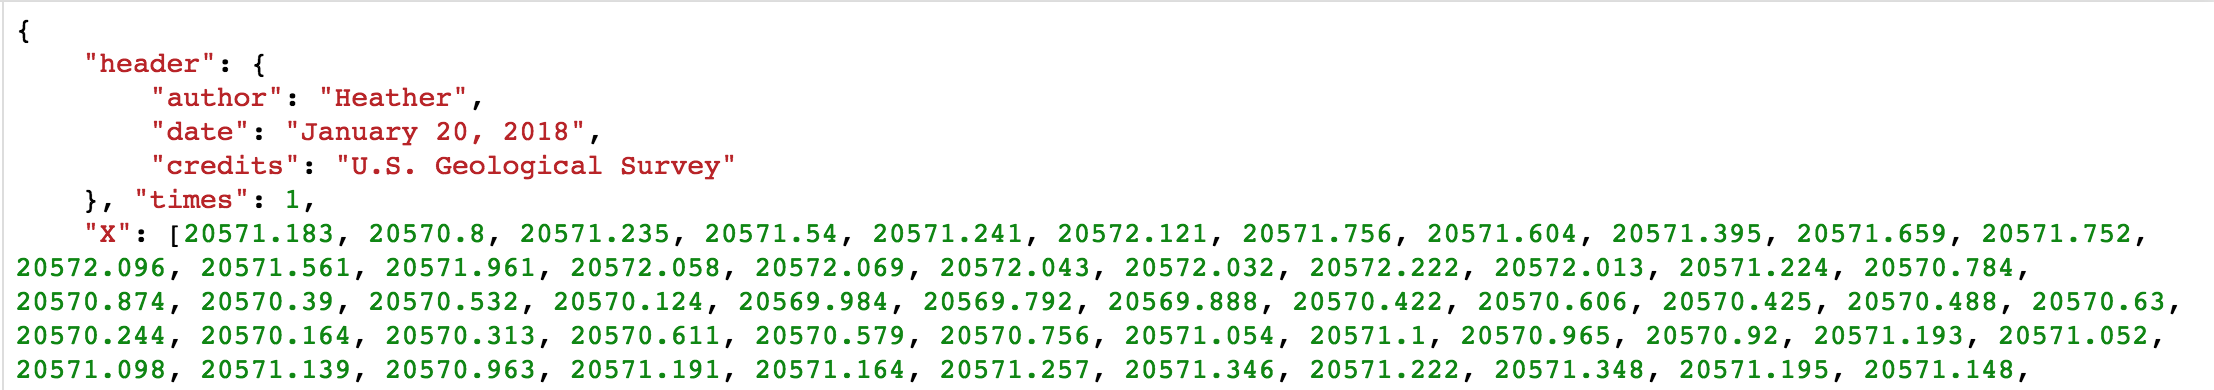

Try exporting the data as a json file.

# Going Forward
----
- Continue writing your log notebooks in Jupyter
- Begin the homework assignment on file input and output.
- (Optional but recommended) Do some numpy tutorials:
    - [NumPy Tutorial via tutorialspoint](https://www.tutorialspoint.com/numpy/index.htm)
    - [NumPy Tutorial via DataCamp](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

